# Machine Learning - Classification
Notes on Machine Learning and classification based on Udacity's Introduction to Machine Learning course.  Algorithms covered include Naive Bayes, Decision Trees, and Adaptive Boosting (Adaboost).

#### The Data Set
All in class examples were covered using a data set that determined the ideal speed of a vehicle based of inclination and bumpiness of a surface.  The following code generates the data set and plots it for use in visual comparison of different classification algorithms:

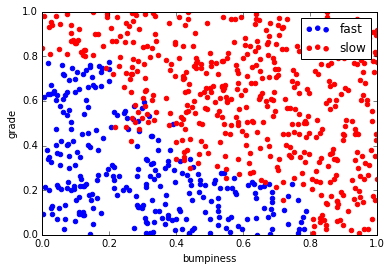

In [1]:
#import
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.metrics import accuracy_score
from time import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#make the data
features_train, labels_train, features_test, labels_test = makeTerrainData()

grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#plot the data
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.legend()
plt.show()

### Naive Bayes
[scikit-learn Page](http://scikit-learn.org/stable/modules/naive_bayes.html) on the Naive Bayes classifier

[Wiki Page](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) on the Naive Bayes classifier

This classifier is based on Bayes Theorem and gained popularity for text classification applications.  The algorithm is called 'Naive' since it treats all variables as independent.

The basic syntax looks like this:

In [2]:
%time
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print('The accuracy of the Naive Bayes classifier is: ', accuracy_score(labels_test, pred))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
('The accuracy of the Naive Bayes classifier is: ', 0.88400000000000001)


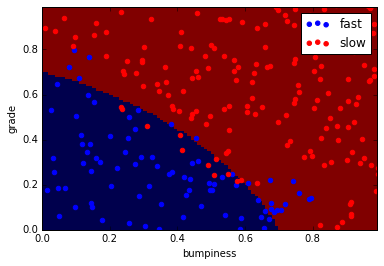

In [3]:
#plot the data and calculated decision boundary 
prettyPicture(clf, features_test, labels_test)

As we can see, the Naive Bayes algorithm is very fast and is decently accurate considering no parameter optimization has been done.

### SVM - Support Vector Machines
[scikit-learn Page](http://scikit-learn.org/stable/modules/svm.html) on the SVM classifier

[Wiki Page](https://en.wikipedia.org/wiki/Support_vector_machine) on the SVM classifier

The SVM classifier excels at classifying data which is difficult to map in a low dimensional space by using kernels (which can be specified).  The algorithm works by constructing a single or set of hyper-planes in higher dimensional space that creates the largest distance from it to the nearest training data points of a class.  

When using this classifier there is a danger of overfitting the data.  To control this issue, the 'C' parameter should be varied so that the accuracy is sufficient, yet the decision boundary is not overly complex.  The larger 'C' is, the more complex the decision boundary becomes (i.e. over fitted).

###### Train with a large C value

In [4]:
%time
from sklearn import svm
clf210000 = svm.SVC(C=10000, kernel='rbf')
clf210000.fit(features_train, labels_train)
pred = clf210000.predict(features_test)
print('The accuracy of the SVM classifier with a C value of 10,000 is: ', accuracy_score(labels_test, pred))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs
('The accuracy of the SVM classifier with a C value of 10,000 is: ', 0.93200000000000005)


###### Train with a small C value

In [5]:
%time
clf210 = svm.SVC(C=10, kernel='rbf')
clf210.fit(features_train, labels_train)
pred = clf210.predict(features_test)
print('The accuracy of the SVM classifier with a C value of 10 is: ', accuracy_score(labels_test, pred))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
('The accuracy of the SVM classifier with a C value of 10 is: ', 0.91200000000000003)


###### Plot the two classifiers and decision boundaries

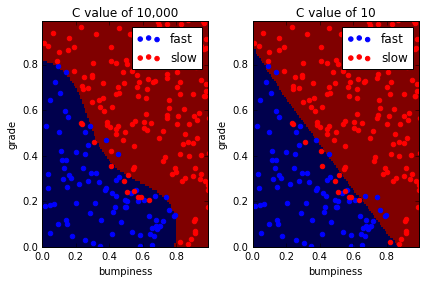

In [6]:
plt.subplot(121)
prettyPicture(clf210000, features_test, labels_test)
plt.title('C value of 10,000')

plt.subplot(122)
prettyPicture(clf210, features_test, labels_test)
plt.title('C value of 10')

plt.tight_layout()

### Decision Trees

[scikit-learn Page](http://scikit-learn.org/stable/modules/tree.html) on the Decision Tree classifier

[Wiki Page](https://en.wikipedia.org/wiki/Decision_tree_learning) on the Decision Tree classifier

Decision Tree classifiers work by attempting to predict a variable's class by use of simple decision rules ascertained from the data itself.  This is accomplished by sequentially splitting the data with decisions nodes that maximize information gain; in essence, splitting the data in the most efficient way possible.  This method is popular as it is easier to visualize and comprehend than most others and requires very little preparation.

When creating the classifier, a key parameter to optimize is the 'min_samples_split' which controls the minimum number of samples that must be present to split a node.  The small the the number the more complex the tree (and thus decision boundary) becomes. 

###### Train with large minimum sample split

In [7]:
%time
from sklearn import tree
clfT8 = tree.DecisionTreeClassifier(min_samples_split=8)
clfT8.fit(features_train, labels_train)
pred = clfT8.predict(features_test)
print('The accuracy of the Decision Tree classifier with a min_samples_split of 8 is: ',
      accuracy_score(labels_test, pred))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs
('The accuracy of the Decision Tree classifier with a min_samples_split of 8 is: ', 0.90800000000000003)


###### Train with a small minimum sample split (defualt of 2)

In [8]:
%time
clfT2 = tree.DecisionTreeClassifier(min_samples_split=2)
clfT2.fit(features_train, labels_train)
pred = clfT2.predict(features_test)
print('The accuracy of the Decision Tree classifier with a min_samples_split of 2 is: ',
      accuracy_score(labels_test, pred))

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs
('The accuracy of the Decision Tree classifier with a min_samples_split of 2 is: ', 0.90800000000000003)


###### Plot the two classifiers and decision boundaries

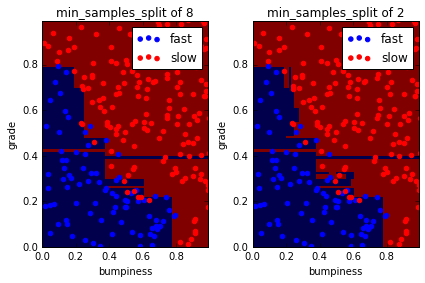

In [9]:
plt.subplot(121)
prettyPicture(clfT8, features_test, labels_test)
plt.title('min_samples_split of 8')

plt.subplot(122)
prettyPicture(clfT2, features_test, labels_test)
plt.title('min_samples_split of 2')

plt.tight_layout()

### AdaBoost 

[scikit-learn Page](http://scikit-learn.org/stable/modules/ensemble.html#adaboost) on AdaBoost classifier

[Wiki Page](https://en.wikipedia.org/wiki/AdaBoost) on AdaBoost classifier

The AdaBoost, or Adaptive Boosting Classifier, is an example of an ensemble method which is also known as a meta-classifier.  This means that it is built from many individual classifiers, each contributing to the final solution.  The algorithm is adaptive in the sense that 'weak learners' are optimized by creating a copy of the original classifier and weighting incorrectly classified variables higher forcing the algorithm to 'work harder' at correctly classifying those points.

Parameters to optimize include the number of weak learners controlled by 'n_estimators', the contribution of the weak learners to the final answer using 'learning_rate', and the base classifier used controlled by 'base_estimator' (note that the default is DecisionTreeClassifier).

###### Train with a large number of weak learners

In [11]:
%time
from sklearn.ensemble import AdaBoostClassifier
clfADB200 = AdaBoostClassifier(n_estimators=200)
clfADB200.fit(features_train, labels_train)
pred = clfADB200.predict(features_test)
print('The accuracy of the AdaBoost classifier with n_estimators of 200 is: ', accuracy_score(labels_test, pred))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
('The accuracy of the AdaBoost classifier with n_estimators of 200 is: ', 0.91600000000000004)


###### Train with a small number (default) weak learners

In [12]:
clfADB50 = AdaBoostClassifier(n_estimators=50)
clfADB50.fit(features_train, labels_train)
pred = clfADB50.predict(features_test)
print('The accuracy of the AdaBoost classifier with the default n_estimators of 50 is: ', 
      accuracy_score(labels_test, pred))

('The accuracy of the AdaBoost classifier with the default n_estimators of 50 is: ', 0.92400000000000004)


###### Plot the two classifiers and decision boundaries

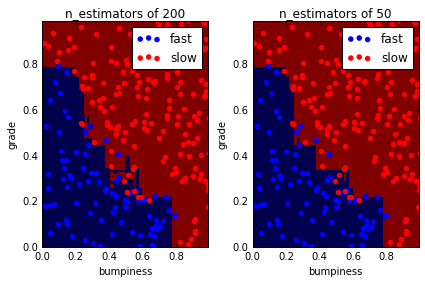

In [13]:
plt.subplot(121)
prettyPicture(clfADB200, features_test, labels_test)
plt.title('n_estimators of 200')

plt.subplot(122)
prettyPicture(clfADB50, features_test, labels_test)
plt.title('n_estimators of 50')

plt.tight_layout()